In [20]:
import pandas as pd
pd.options.display.max_columns = 999

In [65]:
data = pd.read_excel('data.xlsx')  # данные по 482 фильмам

In [66]:
data.describe()

,IMdb_score,Metascore,RT_score,Year,imdbVotes,worldwide-gross,Group
count,482.000000,482.000000,482.000000,482.000000,4.820000e+02,4.820000e+02,482.000000
mean,68.547718,58.345995,61.928350,2008.952282,2.808395e+05,3.700036e+08,2.002075
std,9.124845,16.698983,25.290294,9.471689,2.822187e+05,3.678905e+08,0.816918
min,24.000000,9.000000,3.000000,1948.000000,1.900000e+01,0.000000e+00,1.000000
25%,63.000000,46.423092,43.000000,2004.250000,8.449250e+04,1.002250e+08,1.000000
50%,69.000000,58.000000,66.000000,2012.000000,1.972970e+05,2.481500e+08,2.000000
75%,75.000000,71.000000,84.341836,2016.000000,3.889688e+05,5.424250e+08,3.000000
max,90.000000,101.359200,101.359200,2018.000000,1.990170e+06,2.777200e+09,3.000000


In [53]:
data['worldwide-gross'] = data['worldwide-gross']/1000

In [55]:
import matplotlib.pyplot as plt

(array([ 2.,  0.,  2.,  9., 20., 16., 36., 28., 38., 53., 48., 57., 45.,
        34., 31., 25., 21., 10.,  5.,  2.]),
 array([  9.        ,  13.61795998,  18.23591996,  22.85387994,
         27.47183992,  32.08979991,  36.70775989,  41.32571987,
         45.94367985,  50.56163983,  55.17959981,  59.79755979,
         64.41551977,  69.03347976,  73.65143974,  78.26939972,
         82.8873597 ,  87.50531968,  92.12327966,  96.74123964,
        101.35919962]),
 <a list of 20 Patch objects>)

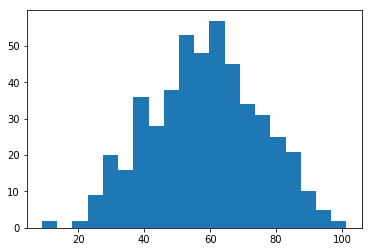

In [62]:
plt.hist(data['Metascore'], bins=20) 

In [ ]:
top = list(data.loc[data['Group'] == 1].Metascore)
middle = list(data.loc[data['Group'] == 2].Metascore)
bottom = list(data.loc[data['Group'] == 3].Metascore)

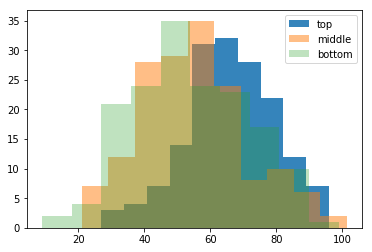

In [105]:
plt.hist(top, label='top', alpha = 0.9)
plt.hist(middle, label='middle', alpha = 0.5)
plt.hist(bottom, label='bottom', alpha = 0.3)
plt.legend()

# Проведем дисперсионный анализ для выявления степени различий между 3 группами фильмов. Предварительно я разделил всю выборку на 3 равные (по количеству) группы с маркировкой от 1 (наибольшие сборы) до 3 (наименьшие сборы).

## Нулевая гипотеза - нет различий между рейтингами в группах. Альтернативная - различия значимы.

In [106]:
import scipy.stats as stats

stats.f_oneway(top, middle, bottom)

F_onewayResult(statistic=30.252669895868202, pvalue=4.2400788846108403e-13)

## Судя по результатам дисперсионного анализа, мы отвергаем нулевую гипотезу - различия между группами значимы.